In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# Problem 1: Logical Regression

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y = ml.shuffleData(X,Y) # reorder randomly (important later)
X,_ = ml.transforms.rescale(X) # works much better on rescaled data

XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2

*For this problem, we are focused on the learning algorithm, rather than performance — so, we will not bother creating training and validation splits; just use all your data for training.*

## 1.1
Show the two classes in a scatter plot (one for each data set) and verify that one data set is linearly separable while the other is not.

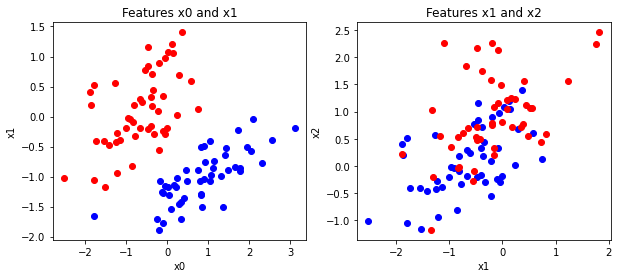

In [3]:
f = plt.figure(figsize=(10,4))
ax1 = plt.subplot(121)
ax1.scatter(XA[YA==0,0], XA[YA==0,1], c='blue')
ax1.scatter(XA[YA==1,0], XA[YA==1,1], c='red')
ax1.title.set_text("Features x0 and x1")
ax1.set_xlabel("x0")
ax1.set_ylabel("x1")
ax2 = plt.subplot(122)
ax2.scatter(XB[YB==1,0], XB[YB==1,1], c='blue')
ax2.scatter(XB[YB==2,0], XB[YB==2,1], c='red')
ax2.title.set_text("Features x1 and x2")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
plt.show()

It appears that the first set of features $x_0$ and $x_1$ are linearly separable and the second set is not.

## 1.2
Write (fill in) the function ```plotBoundary``` in ```logisticClassify2.py``` to compute the points on the decision boundary. In particular, you only need to make sure ```x2b``` is set correctly using ```self.theta```. This will plot the data & boundary quickly, which is useful for visualizing the model during training. To demo your function plot the decision boundary corresponding to the classifier

$ sign( .5 − .25x_1 + 1x_2 ) $

along with the A data, and again with the B data; these fixed parameters will look like an OK classifier on one data set, but a poor classifier on the other.

```
def plotBoundary(self,X,Y):
    """ Plot the (linear) decision boundary of the classifier, along with data """
    if len(self.theta) != 3: raise ValueError('Data & model must be 2D')
        
    ax = X.min(0),X.max(0)
    ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1])
    ## TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
    x1b = np.array([ax[0],ax[1]])  # at X1 = points in x1b
    x2b = (-self.theta[0] / self.theta[2]) + (-self.theta[1] / self.theta[2]) * x1b
    # TODO find x2 values as a function of x1's values
    # Now plot the data and the resulting boundary:
    #rint(X)
    A = Y==self.classes[0] # and plot it:
    plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k-')
    plt.axis(ax)
    plt.draw()
```

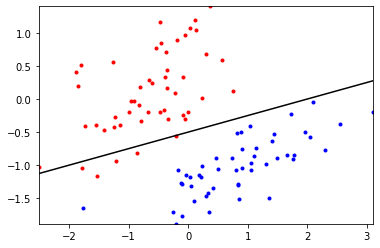

In [4]:
from logisticClassify2 import *
learnerA = logisticClassify2(); # create "blank" learner
learnerA.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([.5,-.25,1]); # TODO: fill in values
learnerA.theta = wts # set the learner’s parameter
learnerA.plotBoundary(XA, YA)

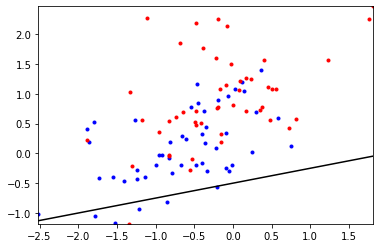

In [5]:
learnerB = logisticClassify2(); # create "blank" learner
learnerB.classes = np.unique(YB) # define class labels using YA or YB
learnerB.theta = wts # set the learner’s parameter
learnerB.plotBoundary(XB, YB)

## 1.3
Complete the ```logisticClassify2.predict``` function to make predictions for your classifier. Verify that your function works by computing & reporting the error rate of the classifier in the previous part on both data sets A and B. (The error rate on one should be ≈ 0.0505, and higher on the other.)
Note that, in the code, the two classes are stored in the variable  ```self.classes```, with the first entry being the “negative” class (or class 0), and the second entry being the “positive” class, so you want to have different learner objects for each dataset, and you use ```learner.err``` directly. Include the function definition and the two computed errors.

```
def predict(self, X):
    """ Return the predictied class of each data point in X"""
    ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] + ... for each i
    ## TODO: if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
    ##       else predict class 0:  Yhat[i] = self.classes[0]
    Yhat = np.zeros((X.size[0],1))
    for i in range(X.size[0]):
        r = self.theta[0] + self.theta[1] * X[i,0] + self.theta[1] * X[i,1]
        if (r > 0):
            Yhat[i] = self.classes[1]
        else:
            Yhat[i] = self.classes[0]
    return Yhat
```

In [6]:
#learner.classes = np.unique(YA) # define class labels using YA or YB
#Ayhat = learnerA.predict(XA)
#errA = np.count_nonzero(Ayhat.T != YA) / YA.size
print("The error rate of the classifier for data set A is", learnerA.err(XA,YA))

The error rate of the classifier for data set A is 0.050505050505050504


In [7]:
#learner.classes = np.unique(YB) # define class labels using YA or YB
#Byhat = learnerB.predict(XB)
print("The error rate of the classifier for data set B is", learnerB.err(XB,YB))

The error rate of the classifier for data set B is 0.46464646464646464


## 1.4
Verify that your predict code matches your boundary plot by using ```plotClassify2D``` with your manually constructed learner on the two data sets. This will call ```predict``` on a dense grid of points, and you should find that the resulting decision boundary matches the one you computed analytically.

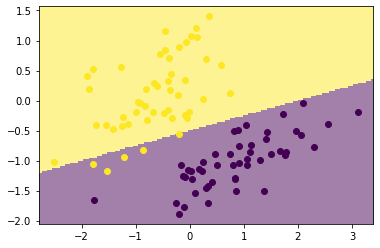

In [8]:
ml.plotClassify2D(learnerA,XA,YA)

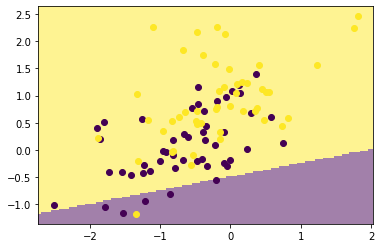

In [9]:
ml.plotClassify2D(learnerB,XB,YB)

## 1.5
In the provided code, we first transform the classes in the data Y into YY , with canonical labels for the two classes: “class 0” (negative) and “class 1” (positive). </br>
In our notation, let 

$$r^{(j)} = x^{(j)} \cdot \theta^T$$ 

be the linear response of the classifier, and $σ$ is the standard logistic function

$$σ(r) = (1 + \exp(-r))^{-1}$$

The logistic negative log likelihood loss for a single data point j is then

$$J_j(\theta) = −y^{(j)} \log σ(x^{(j)} \theta^T) − (1 − y^{(j)}) \log(1 − σ(x^{(j)} \theta^T))$$

where $y^{(j)}$ is either 0 or 1. Derive the gradient of the negative log likelihood $J_j$ for logistic regression, and give it in your report. (You will need this in your gradient descent code for the next part.)
Provide the gradient equations for $$\frac{\partial}{\partial \theta_0}(J_j), \frac{\partial}{\partial \theta_1}(J_j), and \frac{\partial}{\partial \theta_2}(J_j)$$

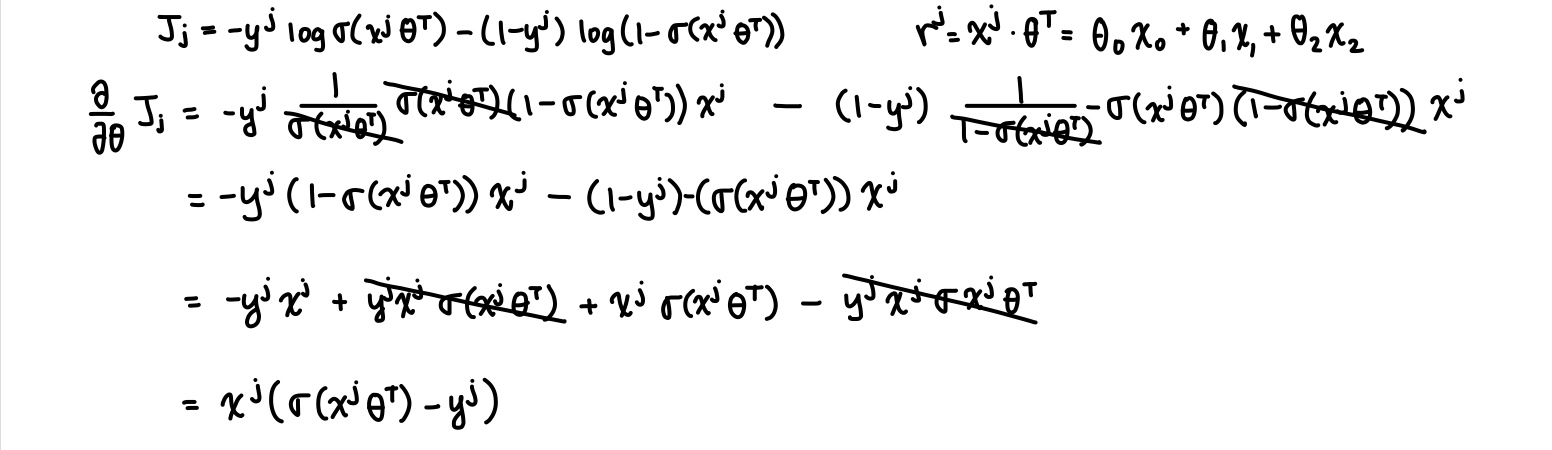

$J_j(\theta) = −y^{(j)} \log σ(\theta_0 + \theta_1x_1 + \theta_2x_2) − (1 − y^{(j)}) \log(1 − σ(\theta_0 + \theta_1x_1 + \theta_2x_2))$

$r = \theta_0x_0 + \theta_1x_1 + \theta_2x_2$

$f(x) = e^x$

$f'(x) = e^x * x'$

$\sigma(r) = (1 + \exp(-r))^{-1}$

$\sigma'(r) = \sigma(r)(1-\sigma(r))$

$g(y) = \log(y)$

$g'(y) = \frac{1}{y} * y'$

---
$\frac{\partial}{\partial \theta_0}(J_j) = -y^j \frac{1}{\sigma(r)} \sigma(r)(1 - \sigma(r))x^j_0 - (1 - y^j) \frac{1}{1 - \sigma(r)} -(\sigma(r)(1 - \sigma(r)))x^j_0$

$= y^j(1 - \sigma(r))x^j_0 - (1 - y^j)(-\sigma(r))x^j_0$

$= -y^jx^j_0 + y^jx^j_0\sigma(r) + x^j_0\sigma(r) - y^jx^j_0\sigma(r)$

$= -y^jx^j_0 + x^j_0\sigma(r)$

$= x^j_0(\sigma(r) - y)$

$= x^j_0(\sigma(x^j_0\theta_0) - y)$

---
$\frac{\partial}{\partial \theta_1}(J_j) = -y^j \frac{1}{\sigma(r)} \sigma(r)(1 - \sigma(r))x^j_1 - (1 - y^j) \frac{1}{1 - \sigma(r)} -(\sigma(r)(1 - \sigma(r)))x^j_1$

$= y^j(1 - \sigma(r))x^j_1 - (1 - y^j)(-\sigma(r))x^j_1$

$= -y^jx^j_1 + y^jx^j_1\sigma(r) + x^j_1\sigma(r) - y^jx^j_1\sigma(r)$

$= -y^jx^j_1 + x^j_1\sigma(r)$

$= x^j_1(\sigma(r) - y)$

$= x^j_1(\sigma(x^j_1\theta_1) - y)$

---
$\frac{\partial}{\partial \theta_2}(J_j) = -y^j \frac{1}{\sigma(r)} \sigma(r)(1 - \sigma(r))x^j_2 - (1 - y^j) \frac{1}{1 - \sigma(r)} -(\sigma(r)(1 - \sigma(r)))x^j_2$

$= y^j(1 - \sigma(r))x^j_2 - (1 - y^j)(-\sigma(r))x^j_2$

$= -y^jx^j_2 + y^jx^j_2\sigma(r) + x^j_2\sigma(r) - y^jx^j_2\sigma(r)$

$= -y^jx^j_2 + x^j_2\sigma(r)$

$= x^j_2(\sigma(r) - y)$

$= x^j_2(\sigma(x^j_2\theta_2) - y)$

## 1.6
Complete ```train``` function to perform stochastic gradient descent on the logistic loss function. This will require that you fill in:
1. computing the surrogate loss function at each epoch ($J = \frac{1}{m}\sum J_j$, from the previous part);
2. computing the response ($r^{(j)}$ and gradient associated with each data point $x^{(j)}$, $y^{(j)}$);
3. a stopping criterion consisting of two conditions (stop when either you have reached ```stopEpochs``` epochs or J has not changed by more than ```stopTol``` since the last epoch).

Include the complete implementation of ```train```.

```
def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
    """ Train the logistic regression using stochastic gradient descent """
    M,N = X.shape;
    self.classes = np.unique(Y);
    XX = np.hstack((np.ones((M,1)),X))
    YY = ml.toIndex(Y,self.classes);
    if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
   
    epoch=0; done=False; Jnll=[]; J01=[];
    while not done:
        stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; 
        for i in np.random.permutation(M):
            ri = self.theta[0] * XX[i,0] + self.theta[1] * XX[i,1] + self.theta[2] * XX[i,2]
            gradi = XX[i,:] * ((1.0/(1.0 + np.exp(-ri))) - YY[i])
            self.theta -= stepsize * gradi;
        J01.append( self.err(X,Y) )
        Jsur = 0
        for i in range(M):
            if YY[i] == 1:
                Jsur += -YY[i]*np.log(1.0/(1.0+np.exp(-np.dot(XX[i,:], self.theta))))
            else:
                Jsur += -(1-YY[i])*np.log(1-(1.0/(1.0+np.exp(-np.dot(XX[i,:], self.theta)))))
        Jsur = Jsur / M
        Jnll.append( Jsur ) # TODO evaluate the current NLL loss
        done = epoch > stopEpochs or Jnll[-1] < stopTol;   # or if Jnll not changing between epochs ( < stopTol )
    
    plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();
    if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw();
    plt.pause(.01);                    # let OS draw the plot
```

## 1.7
Run ```train``` for your logistic regression classifier on both data sets (A and B). Describe your parameter choices for each dataset (stepsize, etc.) and include plots showing the convergence of the surrogate loss and error rate (e.g., the loss values as a function of epoch during gradient descent), and the final converged classifier with the data (the included ```train``` function does that for you already).

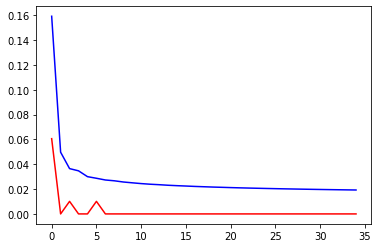

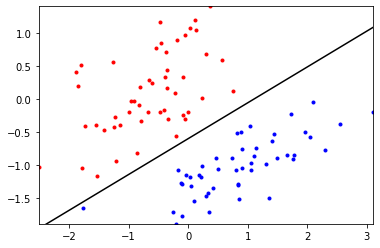

In [10]:
learnerA.train(XA, YA, stopEpochs=50)

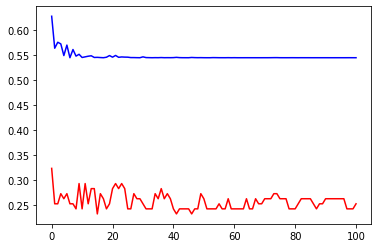

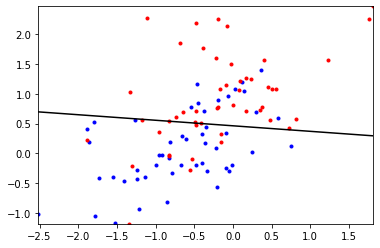

In [11]:
learnerB.train(XB, YB, initStep=.75, stopTol=1e-7, stopEpochs=500)

Describe your parameter choices for each dataset (stepsize, etc.)</br>
Parameters:
- initStep is the initial step size. In the function it is used to initialize the step size used in the Stochastic Gradient Descent. 
- stopTol is used to determine whether the negative log-likelihood is changing "enough". If there is very minimal change (close to 0), then the function considers the training to be finished.
- stopEpochs is a cap on the number of epochs, or training loops to occur. 

A:
- I thought a change in the initial step was unnecessary so I defaulted to 1
- stopTol was also acceptable
- I wanted to limit the number of epochs so I chose a value of 50. This seems to be large enough that the train function will reach an acceptable classifier.

B:
- Since the plot is not linearly separable I wanted to try and see the effects of a larger step size. It seemed to run better with a smaller step, so I tried 0.75.
- I also wanted to make sure that the differences in negative log-liklihood values were smaller, so I reduced the stopTol.
- 5000 was still too big for this classifier, so I made it 500. I wanted to make sure that there was still enough loops for the classifier to improve while limiting it from looping 5000 times. 500 seemed to be good as the classifier usually takes between 100-200 times to run, and I wanted to give it enough leeway in case a bad point was chosen.

# Problem 2: Shattering

## 2.1
Consider the data points in Figure 1 which have two real-valued features $x_1$, $x_2$. We are also giving a few learners below. For the learners below, $T[z]$ is the sign threshold function 

$$
T[z] = \left\{
    \begin{array}\\
        +1 & \mbox{if } \ z \geq 0 \\
        -1 & \mbox{if } \ z < 0
    \end{array}
\right.
$$

The learner parameters $a, b, c, . . .$ are real-valued scalars, and each data point has two real-valued features $x_1$, $x_2$.

Which of the four datasets can be shattered by each learner? Give a brief explanation/justification and use your results to guess the VC dimension of the classifier (you do not have to give a formal proof, just your reasoning)

(0.0, 10.0)

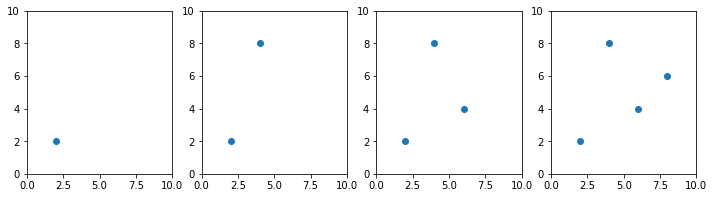

In [12]:
fig = plt.figure(figsize=(12, 3))
a = plt.subplot(141);fig.add_axes(a);a.scatter(2,2);a.set_xlim([0,10]);a.set_ylim([0,10])

b = plt.subplot(142);fig.add_axes(b);b.scatter([2, 4],[2, 8]);b.set_xlim([0,10]);b.set_ylim([0,10])

c = plt.subplot(143);fig.add_axes(c);c.scatter([2, 4, 6],[2, 8, 4]);c.set_xlim([0,10]);c.set_ylim([0,10])

d = plt.subplot(144);fig.add_axes(d);d.scatter([2, 4, 6, 8],[2, 8, 4, 6]);d.set_xlim([0,10]);d.set_ylim([0,10])

### 2.1.1
$T( a + bx_1 )$

This can shatter plots A and B.

A
- The learner is able to correctly categorize point (2, 2) when:
$$
\begin{aligned}\\
&\begin{array}{ccc}
\hline \hline \text { (2, 2) } & \text { a value } & \text { b value } \\
\hline 
\text { + } & 0 & 0 \\
\text { - } & -1 & -1 \\
\hline
\end{array}
\end{aligned}
$$

B
- The learner is able to correctly categorize the two points when:
$$
\begin{aligned}\\
&\begin{array}{cccc}
\hline \hline \text { (2, 2) } & \text { (4, 8) } & \text { a value } & \text { b value } \\
\hline 
\text { + } & \text { + } & 0 & 0 \\
\text { + } & \text { - } & -1 & -1 \\
\text { - } & \text { + } & 2 & -1 \\
\text { - } & \text { - } & -3 & 1 \\
\hline
\end{array}
\end{aligned}
$$

It cannot shatter set C:
If (2, 2) is positive, (4, 8) is negative, and (6, 4) is positive, there is no way to multiply and add numbers that would result in 2 and 6 both being larger than 4. 

I think that the VC Dimension of this classifier is 2.

### 2.1.2
$T( (a ∗ b)x_1 + (\frac{c}{a})x_2 )$

A
- The learner is able to correctly categorize point (2, 2) when:
$$
\begin{aligned}\\
&\begin{array}{ccccc}
\hline \hline \text { (2, 2) } & \text { a value } & \text { b value } & \text { c value }  \\
\hline 
\text { + } & 1 & 0 & 0 \\
\text { - } & -1 & 1 & 1 \\
\hline
\end{array}
\end{aligned}
$$

B
- The learner is able to correctly categorize points (2, 2) and (4, 8):
$$
\begin{aligned}\\
&\begin{array}{ccccc}
\hline \hline \text { (2, 2) } & \text { (4, 8) } & \text { a value } & \text { b value } & \text { c value } \\
\hline 
\text { + } & \text { + } & 1 & 0 & 0 \\
\text { + } & \text { - } & 1 & 1 & -1 \\
\text { - } & \text { + } & 1 & -1 & \frac{1}{2} \\
\text { - } & \text { - } & 1 & 1 & -2 \\
\hline
\end{array}
\end{aligned}
$$

I think the VC Dimension of the classifier is 2.

### 2.1.3 
$T( (x_1 − a)^2 + (x_2 − b)^2 + c )$

This can shatter plots A and B.

A
- The learner is able to correctly categorize point (2, 2) when:
$$
\begin{aligned}\\
&\begin{array}{ccccc}
\hline \hline \text { (2, 2) } & \text { a value } & \text { b value } & \text { c value }  \\
\hline 
\text { + } & 2 & 2 & 1 \\
\text { - } & 2 & 2 & -1 \\
\hline
\end{array}
\end{aligned}
$$

B
- The learner is able to correctly categorize points (2, 2) and (4, 8) when:
$$
\begin{aligned}\\
&\begin{array}{ccccc}
\hline \hline \text { (2, 2) } & \text { (4, 8) }  & \text { a value } & \text { b value } & \text { c value }  \\
\hline 
\text { + } & \text { + } & 0 & 0 & 0 \\
\text { + } & \text { - } & 4 & 8 & -1 \\
\text { - } & \text { + } & 2 & 2 & -1 \\
\text { - } & \text { - } & 3 & 5 & -11 \\
\hline
\end{array}
\end{aligned}
$$

C
- The learner is able to correctly categorize points (2, 2), (4, 8), and (6, 4) when:
$$
\begin{aligned}\\
&\begin{array}{ccccc}
\hline \hline \text { (2, 2) } & \text { (4, 8) }  & \text { (6, 4) }  & \text { a value } & \text { b value } & \text { c value }  \\
\hline 
\text { + } & \text { + } & \text { + } & 0 & 0 & 0 \\
\text { + } & \text { + } & \text { - } & 6 & 4 & -1 \\
\text { + } & \text { - } & \text { + } & 4 & 8 & -1 \\
\text { + } & \text { - } & \text { - } & 5 & 6 & -6 \\
\text { - } & \text { + } & \text { + } & 2 & 2 & -1 \\
\text { - } & \text { + } & \text { - } & 4 & 0 & -41 \\
\text { - } & \text { - } & \text { + } & 0 & 8 & -41 \\
\text { - } & \text { - } & \text { - } & 4 & 5 & -14 \\
\hline
\end{array}
\end{aligned}
$$

The learner cannot shatter plot D because it fails when (2, 2) and (8, 6) are negative and (4, 8) and (6, 4) are positive.

I think the VC Dimension of the classifier is 3.

### 2.1.4
$T( a + bx_1 + cx_2 ) × T( d + bx_1 + cx_2 )$

Hint: The two equations are two parallel lines

This can shatter plots A, B, C

A
- The learner is able to correctly categorize point (2, 2) when:
$$
\begin{aligned}\\
&\begin{array}{ccccc}
\hline \hline \text { (2, 2) } & \text { a value } & \text { b value } & \text { c value } & \text { d value } \\
\hline 
\text { + } & 0 & 1 & 1 & 0 \\
\text { - } & 1 & 0 & 0 & -1 \\
\hline
\end{array}
\end{aligned}
$$

B
- The learner is able to correctly categorize points (2, 2) and (4, 8) when:
$$
\begin{aligned}\\
&\begin{array}{ccccc}
\hline \hline \text { (2, 2) } & \text { (4, 8) } & \text { a value } & \text { b value } & \text { c value } & \text { d value } \\
\hline 
\text { + } & \text { + } & 0 & 0 & 0 & 0 \\
\text { + } & \text { - } & 1 & 2 & -1 & -1 \\
\text { - } & \text { + } & -1 & -1 & 1 & 0 \\
\text { - } & \text { - } & 0 & 0 & 01 & -1 \\
\hline
\end{array}
\end{aligned}
$$

C
- The learner is able to correctly categorize points (2, 2), (4, 8), and (6, 4) when:
$$
\begin{aligned}\\
&\begin{array}{ccccccc}
\hline \hline \text { (2, 2) } & \text { (4, 8) } & \text { (6, 4) } & \text { a value } & \text { b value } & \text { c value } & \text { d value } \\
\hline 
\text { + } & \text { + } & \text { + } & 0 & 1 & 1 & 0 \\
\text { + } & \text { + } & \text { - } & 2 & -1 & 1 & 0 \\
\text { + } & \text { - } & \text { + } & 4 & 1 & -1 & 0 \\
\text { + } & \text { - } & \text { - } & 12 & 1 & -1 & 4 \\
\text { - } & \text { + } & \text { + } & -4 & -1 & -1 & 0 \\
\text { - } & \text { + } & \text { - } & -2 & 1 & -1 & 0 \\
\text { - } & \text { - } & \text { + } & -1 & 1 & -1 & 4 \\
\text { - } & \text { - } & \text { - } & 0 & 1 & 1 & -1 \\
\hline
\end{array}
\end{aligned}
$$

The learner cannot shatter D because it cannot correctly categorize the data when (2, 2) and (8, 6) are positive and (6, 4) and (4, 8) are negative.

I think the VC Dimension of this classifier is 3.

# Statement of Collaboration

I did not collaborate with anyone on this.